In [4]:
import numpy as np
from random import random
from scipy.stats import stats, kstest

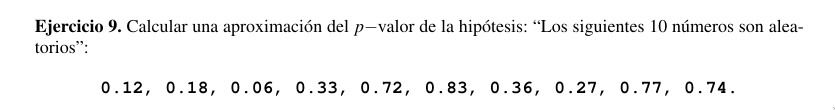

In [31]:
datos = [0.12, 0.18, 0.06, 0.33, 0.72, 0.83, 0.36, 0.27, 0.77, 0.74]

# Realizar el test de Kolmogorov-Smirnov
# Tenemos que F(X[i]) = x[i]
# Calculamos el estadistico
def K_S(datos):
  n = len(datos)
  d = 0
  datos.sort()
  for j in range(n):
    d = max(d, (j+1)/n - datos[j], datos[j] - j/n)
  return d

def sim(n, ks, nsim=10_000):
  pvalor = 0
  for _ in range(nsim):
    muestra = []
    for _ in range(n):
      muestra.append(random())
    muestra.sort()
    d_j = K_S(muestra)
    if d_j >= ks:
      pvalor += 1
  return pvalor/nsim

print(f"Simulado {sim(10, K_S(datos), 1_000_000)}")
print(f"kstest {kstest(datos,'uniform')[1]}")


Simulado 0.535715
kstest 0.5354975540922944
